<a href="https://colab.research.google.com/github/glitterboye/cosc155/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing RAPIDS Dependencies

In [ ]:
!nvidia-smi

Thu Dec 16 23:23:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    28W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py
!bash rapidsai-csp-utils/colab/update_gcc.sh

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 295 (delta 69), reused 40 (delta 21), pack-reused 171
Receiving objects: 100% (295/295), 85.09 KiB | 650.00 KiB/s, done.
Resolving deltas: 100% (131/131), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 k

In [ ]:
import os
os._exit(00)

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.10


The following packages will be downloaded:

    package                

In [ ]:
import cugraph
import cudf
from collections import OrderedDict

## Imports & Functions

In [ ]:
import networkx as nx
import pandas as pd
from matplotlib.pyplot import figure
from random import choice
from collections import OrderedDict
import operator
from pprint import pprint

In [ ]:
# Return the top 5 search results (ex Page 1 of Google)
def top_result(pr):
  res = sorted(pr.items(),key=operator.itemgetter(1),reverse=True)
  print('='*30)
  print('Google Search Result (Page 1)'.center(30))
  print('='*30)
  
  res = res[:6]
  for v in res:
    print(v[0].ljust(18), ' | Score: ', str(v[1]*100)+'%'.ljust(30))

In [ ]:
# Return DF of 2 Columns
def make_colB(filename):
  # open df with 1 column
  df = pd.read_csv(filename)

  # construct random 2nd column from 1st
  colA = df['Domain_A']
  colB = []
  for i in range(len(colA)):
    colB.append(choice(colA))
  df['Domain_B'] = colB

  return df

# Example Page Rank

In [ ]:
# Convert to DF
data = {'Domain_A': ['Wikipedia','Wikipedia','Wikipedia','Wikipedia','Wikipedia'],
        'Domain_B': ['Chegg', 'NY Times', 'Quizlet', 'YouTube', 'Georgetown']}

ex_df = pd.DataFrame.from_dict(data)

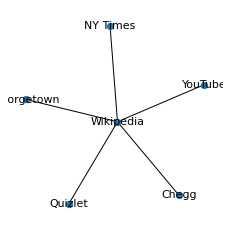

In [ ]:
# Generate Example Graph of Page Relationships
G_ex = nx.Graph()
ex_df1 = ex_df[['Domain_A', 'Domain_B']]
G_ex = nx.from_pandas_edgelist(ex_df1, 'Domain_A', 'Domain_B')

# Search Result Topology
figure(figsize=(3,3))
nx.draw(G_ex, node_size=40, font_size=11, with_labels=True)

In [ ]:
# Def Parameters
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# Get Pagerank for All Sites
pr_nx = nx.pagerank(G_ex, alpha=alpha, max_iter=max_iter, tol=tol)

In [ ]:
top_result(pr_nx)

Google Search Result (Page 1) 
Wikipedia           | Score:  47.29600866404883%                             
Chegg               | Score:  10.54079826719024%                             
NY Times            | Score:  10.54079826719024%                             
Quizlet             | Score:  10.54079826719024%                             
YouTube             | Score:  10.54079826719024%                             
Georgetown          | Score:  10.54079826719024%                             


# Begin CPU to GPU Comparison

**10 Page Links**

In [ ]:
# CSV File of Top 10 Domains
df = make_colB('10.csv')
df

,Domain_A,Domain_B
0,youtube.com,en.wikipedia.org
1,support.google.com,play.google.com
2,www.google.com,www.blogger.com
3,apple.com,youtube.com
4,play.google.com,support.google.com
5,microsoft.com,youtube.com
6,www.blogger.com,play.google.com
7,linkedin.com,linkedin.com
8,en.wikipedia.org,en.wikipedia.org
9,docs.google.com,www.blogger.com


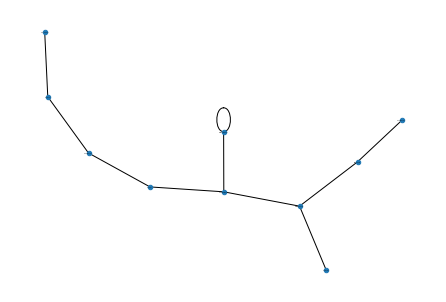

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is 2.5x Slower Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 10.3 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 3.98 ms, sys: 0 ns, total: 3.98 ms
Wall time: 3.8 ms


In [ ]:
top_result(pr_nx)

Google Search Result (Page 1) 
www.google.com      | Score:  15.086039793984796%                             
support.google.com  | Score:  14.075142285604016%                             
linkedin.com        | Score:  11.38516849347004%                             
microsoft.com       | Score:  11.036955536550533%                             
play.google.com     | Score:  10.583420812103032%                             
apple.com           | Score:  9.985009008186355%                             


**100 Page Links**

In [ ]:
# CSV File of Top 100 Domains
df = make_colB('100.csv')
df

,Domain_A,Domain_B
0,youtube.com,theguardian.com
1,support.google.com,live.com
2,www.google.com,issuu.com
3,apple.com,cloudflare.com
4,play.google.com,facebook.com
...,...,...
95,lefigaro.fr,brandbucket.com
96,google.ru,accounts.google.com
97,independent.co.uk,vk.com
98,usatoday.com,medium.com


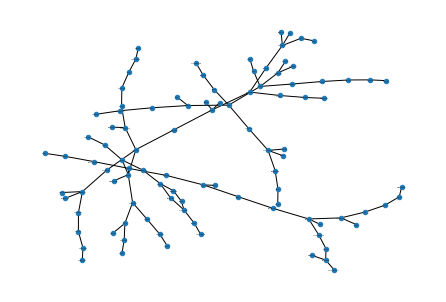

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is 1.1x Slower Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 14.3 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 6.84 ms, sys: 1.8 ms, total: 8.64 ms
Wall time: 13.2 ms


**1,000 Page Links**

In [ ]:
# CSV File of Top 1,000 Domains
df = make_colB('1_000.csv')
df

,Domain_A,Domain_B
0,youtube.com,plos.org
1,support.google.com,lifehacker.com
2,www.google.com,amazon.de
3,apple.com,play.google.com
4,play.google.com,google.co.id
...,...,...
995,boston.com,mashable.com
996,ssl-images-amazon.com,sciencedaily.com
997,bp0.blogger.com,mediafire.com
998,nba.com,hbr.org


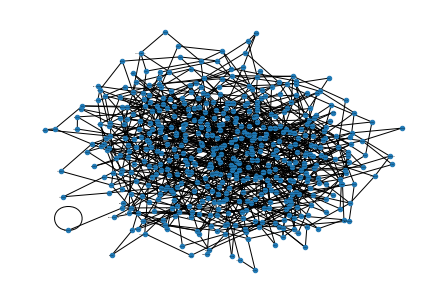

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is ~1.1x Faster Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 8.21 ms, sys: 0 ns, total: 8.21 ms
Wall time: 8.8 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 8.24 ms, sys: 78 µs, total: 8.31 ms
Wall time: 9.9 ms


**10,000 Page Links**

In [ ]:
# CSV File of Top 10,000 Domains
df = make_colB('10_000.csv')
df

,Domain_A,Domain_B
0,youtube.com,google.co.id
1,support.google.com,politico.com
2,www.google.com,greenpeace.org
3,apple.com,groups.yahoo.com
4,play.google.com,rambler.ru
...,...,...
9996,boston.com,rambler.ru
9997,ssl-images-amazon.com,pbs.org
9998,bp0.blogger.com,kakao.com
9999,nba.com,ru.wikipedia.org


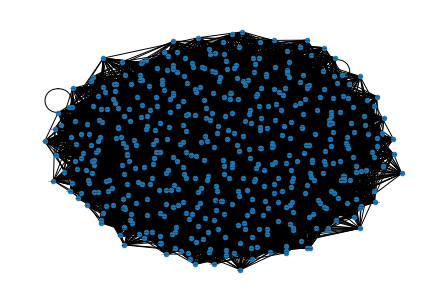

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is ~4x Faster Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 7.81 ms, sys: 0 ns, total: 7.81 ms
Wall time: 7.92 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 22.6 ms, sys: 0 ns, total: 22.6 ms
Wall time: 24.8 ms


**100,000 Page Links**

In [ ]:
# CSV File of Top 100,000 Domains
df = make_colB('100_000.csv')
df

,Domain_A,Domain_B
0,youtube.com,so-net.ne.jp
1,support.google.com,wikia.com
2,www.google.com,twitter.com
3,apple.com,adobe.com
4,play.google.com,imdb.com
...,...,...
99995,searchenginejournal.com,hp.com
99996,usda.gov,pcmag.com
99997,upenn.edu,yadi.sk
99998,timeout.com,myspace.com


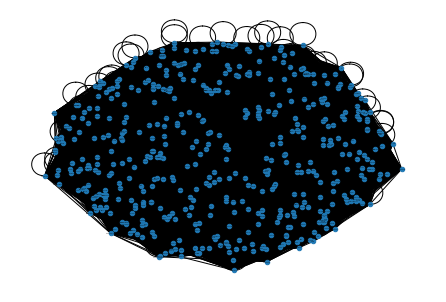

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is ~40x Faster Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 6.43 ms, sys: 35 µs, total: 6.47 ms
Wall time: 6.95 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 284 ms, sys: 9.45 ms, total: 293 ms
Wall time: 296 ms


**1_000,000 Page Links**

In [ ]:
# CSV File of Top 1_000,000 Domains
# had to import from Drive.. Colab file issues
df = make_colB('/content/drive/MyDrive/1_000_000.csv')
df

,Domain_A,Domain_B
0,youtube.com,youtu.be
1,support.google.com,cnet.com
2,www.google.com,urbandictionary.com
3,apple.com,etsy.com
4,play.google.com,support.google.com
...,...,...
999996,searchenginejournal.com,who.int
999997,usda.gov,photobucket.com
999998,upenn.edu,guardian.co.uk
999999,timeout.com,shutterstock.com


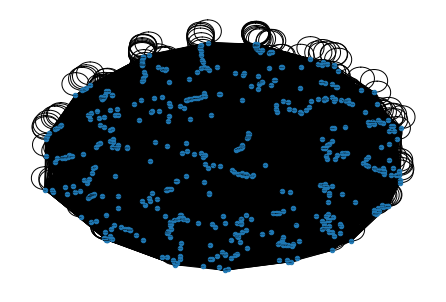

In [ ]:
# Topology of Large Web Search Result
G_cpu = nx.Graph()
df1 = df[['Domain_A', 'Domain_B']]
G_cpu = nx.from_pandas_edgelist(df1, 'Domain_A', 'Domain_B')
nx.draw(G_cpu, node_size=20, font_size=1, with_labels=True)

In [ ]:
# define parameters 
max_iter = 100  # The maximum number of iterations
tol = 0.00001   # tolerance
alpha = 0.85    # alpha

In [ ]:
# create a Graph using the source (src) and destination (dst) vertex pairs from the Dataframe 
G_gpu = cugraph.from_edgelist(df, 'Domain_A', 'Domain_B')

**GPU is ~100x Faster Than CPU**

In [ ]:
%%time
pr_gx = cugraph.pagerank(G_gpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 6 ms, sys: 1.01 ms, total: 7 ms
Wall time: 6.78 ms


In [ ]:
%%time
pr_nx = nx.pagerank(G_cpu, alpha=alpha, max_iter=max_iter, tol=tol)

CPU times: user 710 ms, sys: 6.75 ms, total: 716 ms
Wall time: 789 ms
